In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

##### Open quality df produced by CheckM_plot.ipynb and the GTDB df's from GTDB_SanityCheck.ipynb

In [220]:
#Small datasets of 56 samples
df_quality = pd.read_csv('data56_related_files/Contamination_completness_df.csv')
df_qualityMax100 = pd.read_csv('data56_related_files/ContaminationMax100_completness_df.csv')
df_Lactobacillus = pd.read_csv('data56_related_files/GTDB_Lactobacillus.csv')
df_Alistipes = pd.read_csv('data56_related_files/GTDB_Alistipes.csv')
df_Lactobacillaceae = pd.read_csv('data56_related_files/GTDB_Lactobacillaceae.csv')
df_NCBI_Lactobacillus = pd.read_csv('data56_related_files/GTDB_NCBI_Lactobacillus.csv')

In [221]:
#rename key to get identical in all datasets
df_Lactobacillus = df_Lactobacillus.rename({'user_genome': 'Bin_Id'}, axis=1) 
df_Alistipes = df_Alistipes.rename({'user_genome': 'Bin_Id'}, axis=1) 
df_Lactobacillaceae = df_Lactobacillaceae.rename({'user_genome': 'Bin_Id'}, axis=1)
df_NCBI_Lactobacillus = df_NCBI_Lactobacillus.rename({'user_genome': 'Bin_Id'}, axis=1)

In [222]:
df_quality.head(5)

,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3
0,S10C10200,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.0,3,2
1,S10C1032,o__Bacteroidales_(UID2654),163,486,266,298,186,2,0,0,0,38.94,0.38,0.0,3,2
2,S10C1039,o__Lactobacillales_(UID355),490,334,183,3,331,0,0,0,0,98.91,0.00,0.0,0,0
3,S10C1094,k__Bacteria_(UID203),5449,104,58,92,12,0,0,0,0,14.66,0.00,0.0,3,2
4,S10C10947,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.0,3,2


In [223]:
df_Lactobacillus.head(5)

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,Species,sample,cluster
0,S10C205,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,84.32,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus crispatus,S10,205
1,S10C362,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,70.24,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus gallinarum,S10,362
2,S10C569,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,95.00,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus johnsonii,S10,569
3,S11C205,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,72.60,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus crispatus,S11,205
4,S11C569,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,84.93,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus johnsonii,S11,569


#### Joining quality with taxonomy
Left join to add the quality to the tax df 

In [224]:
df_Lactobacillus_Q = df_Lactobacillus.join(df_quality.set_index('Bin_Id'), on='Bin_Id')
df_Alistipes_Q = df_Alistipes.join(df_quality.set_index('Bin_Id'), on='Bin_Id')

In [225]:
df_Lactobacillaceae_Q = df_Lactobacillaceae.join(df_quality.set_index('Bin_Id'), on='Bin_Id')

In [226]:
df_NCBI_Lactobacillus_Q = df_NCBI_Lactobacillus.join(df_quality.set_index('Bin_Id'), on='Bin_Id')

In [227]:
df_Lactobacillus_Q.head(5)

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3
0,S10C205,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,84.32,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,...,385,2,0,0,0,92.48,0.21,100.00,0,0
1,S10C362,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,70.24,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,...,345,3,0,0,0,88.12,0.65,100.00,1,1
2,S10C569,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,95.00,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,...,441,0,0,0,0,96.90,0.00,0.00,0,0
3,S11C205,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,72.60,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,...,350,0,0,0,0,86.04,0.00,0.00,1,1
4,S11C569,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,84.93,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,...,399,43,1,0,0,96.81,12.08,4.35,3,2


In [228]:
df_Lactobacillaceae_Q.head(5)

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3
0,S10C1039,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,94.58,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Limosilactobacillus,...,331,0,0,0,0,98.91,0.00,0.0,0,0
1,S10C1113,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,96.07,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Limosilactobacillus,...,331,0,0,0,0,99.45,0.00,0.0,0,0
2,S10C119,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,67.12,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Weissella,...,261,3,0,0,0,71.36,1.07,100.0,1,1
3,S10C1297,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,93.47,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Ligilactobacillus,...,341,1,0,0,0,96.60,0.26,0.0,0,0
4,S10C1752,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,85.09,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Ligilactobacillus,...,290,0,0,0,0,77.49,0.00,0.0,1,1


In [229]:
df_Alistipes_Q.head(5)

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3
0,S10C15900,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,95.37,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Rikenellaceae,g__Alistipes,...,311,2,0,0,0,99.52,0.96,0.00,0,0
1,S10C90,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,14.08,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Rikenellaceae,g__Alistipes,...,70,0,0,0,0,20.83,0.00,0.00,3,2
2,S11C90,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,90.49,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Rikenellaceae,g__Alistipes,...,305,4,0,0,0,98.38,1.68,50.00,0,0
3,S12C685,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,14.91,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Rikenellaceae,g__Alistipes,...,40,0,0,0,0,4.17,0.00,0.00,3,2
4,S12C90,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,20.31,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Rikenellaceae,g__Alistipes,...,35,69,0,0,0,100.00,83.62,46.38,3,2


In [230]:
df_NCBI_Lactobacillus_Q.head(5)

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3
0,S10C1039,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,94.58,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Limosilactobacillus,...,331,0,0,0,0,98.91,0.00,0.0,0,0
1,S10C1113,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,96.07,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Limosilactobacillus,...,331,0,0,0,0,99.45,0.00,0.0,0,0
2,S10C1297,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,93.47,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Ligilactobacillus,...,341,1,0,0,0,96.60,0.26,0.0,0,0
3,S10C1752,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,85.09,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Ligilactobacillus,...,290,0,0,0,0,77.49,0.00,0.0,1,1
4,S10C188,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,94.90,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Limosilactobacillus,...,326,0,0,0,0,95.38,0.00,0.0,0,0


In [231]:
df_quality.groupby('class_3').count()

,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class
class_3,,,,,,,,,,,,,,,
0,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609
1,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755
2,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601


#### Bin class distribution and plots of both Lactobacillus and Alistipes bins

In [232]:
df_Lactobacillus_Q.groupby('bin_class').count()

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,class_3
bin_class,,,,,,,,,,,,,,,,,,,,,
0,51,51,48,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
1,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
3,16,16,15,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16


In [233]:
def drawScatter(axes, df, palette, yticks=np.arange(0, 101, 25)):
    sns.scatterplot(ax=axes[0],
                    data = df,
                    x = df.Completeness, 
                    y = df.Contamination, 
                    hue = df.class_3,
                    palette = palette,
                    legend = False)

    axes[0].set_xlabel('CheckM Completeness score', fontsize=18)
    axes[0].set_ylabel('CheckM Contamination score', fontsize=18)
    axes[0].set_xticks(np.arange(0, 101, 25))
    axes[0].set_yticks(yticks)
    axes[0].tick_params(axis='x', labelsize=16 )
    axes[0].tick_params(axis='y', labelsize=16 )



In [315]:
def drawHist(axes, df, palette):
    histplt = sns.histplot(ax = axes[1],
                data = df, 
                x = "class_3", 
                hue = "class_3",
                alpha = 0.7,
                bins = 3,
                palette = palette,
                legend = False)
    axes[1].set_xlabel('')
    axes[1].set_ylabel('Bin count', fontsize=18)
    axes[1].set_xticks([0.35,1,1.7])
    plt.yticks(fontsize=16)
    axes[1].set_xticklabels(labels = ['compl. >90% \n cont. <5%', 
                                      'compl. ≥50% \n cont. <10%', 
                                      'compl. <50% \n cont. ≥10%'], fontsize=14)
    #adding numbers on top of bars. 
#     for rect in axes[1].patches:
#         height = rect.get_height()
#         axes[1].annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
#                     xytext=(0, 5), textcoords='offset points', ha='center') 

In [235]:
def barPlot(axes, df, palette):
    sns.barplot(ax = axes[1],
                data = df,
                x = "class_3",
                y = "class_3".count(),
                hue = "bin_class",
                palette = palette,
                legend = False)
    axes[1].set_xlabel('')
    axes[1].set_ylabel('Bin count', fontsize=16)
    axes[1].set_xticks([0.35,1,1.7])

    axes[1].set_xticklabels(labels = ['compl. > 90% \n cont. <5%', 'compl. ≥ 50% \n cont. <10%', 'compl. < 50% \n cont. ≥ 10%'])

In [310]:
def drawLegend(fig, palette, nrOfclasses):
    if (nrOfclasses == 2):
        medium = Patch(color=palette[1], label='Medium High Quality')
        high = Patch(color=palette[0], label='High Quality')
   
        fig.legend( 
            handles=[medium, high],
            loc = 'center', 
            bbox_to_anchor = (0.5, -0.08),
            ncol = nrOfclasses, 
            fontsize = 16,
            frameon = False)
    
    if (nrOfclasses == 3):
        low = Patch(color=palette[2], label='Low Quality')
        medium = Patch(color=palette[1], label='Medium High Quality')
        high = Patch(color=palette[0], label='High Quality')

        fig.legend( 
            handles=[low, medium, high],
            loc = 'center', 
            bbox_to_anchor = (0.5, -0.08),
            ncol = nrOfclasses, 
            fontsize = 16,
            frameon = False)

    if (nrOfclasses == 4):
        low = Patch(color=palette[3], label='Low Quality')
        mediumHigh = Patch(color=palette[1], label='Medium High Quality \n  SQ > 50')
        mediumLow = Patch(color=palette[2], label='Medium Low Quality \n  SQ < 50')
        high = Patch(color=palette[0], label='High Quality')
    
        fig.legend( 
            handles=[low, mediumLow, mediumHigh, high],
            loc = 'center', 
            bbox_to_anchor = (0.5, -0.08),
            ncol = nrOfclasses, 
            fontsize = 16,
            frameon = False)


In [244]:
def setPalette(paletteName):
    return sns.color_palette(paletteName, 4)

In [245]:
def subplot_binQ (df1, df2, title, nrOfclasses, paletteName, yticks=np.arange(0, 101, 25)):
    fig, axes = plt.subplots(1, 2, figsize=(12,6))
#     fig.suptitle('Bin Quality ' + title, fontsize=20) 
#     plt.yticks(fontsize=16)
#     plt.xticks(fontsize=14)
    
    palette = setPalette(paletteName)
    
    drawScatter(axes, df1, paletteName, yticks)
    
    drawHist(axes, df2, paletteName)
    
    drawLegend(fig, palette, nrOfclasses)
  
    plt.tight_layout()

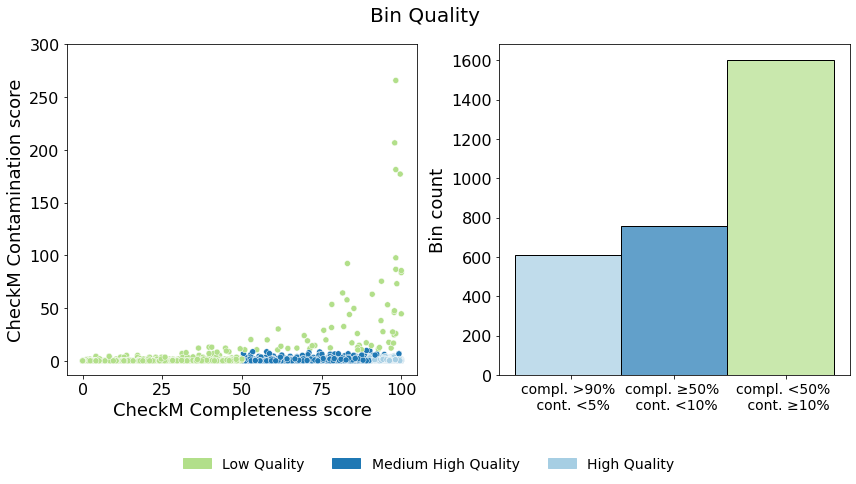

In [213]:
subplot_binQ(df_quality, df_quality, '', nrOfclasses=3, 
             paletteName="Paired", yticks = np.arange(0, 301, 50) )

plt.savefig('resultFigs/binQuality_allbins.png',  bbox_inches='tight')


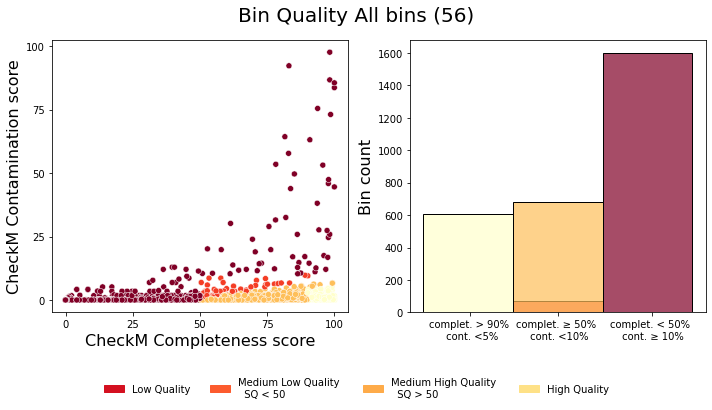

In [64]:
subplot_binQ(df_qualityMax100, df_quality, 'All bins (56)', nrOfclasses=4, paletteName="YlOrRd")

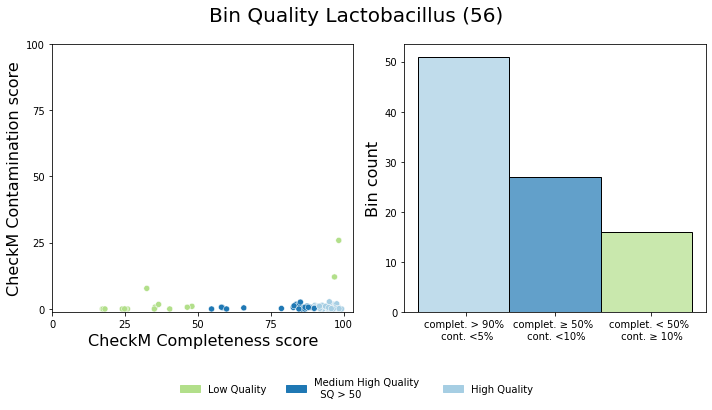

In [31]:
subplot_binQ(df_Lactobacillus_Q, df_Lactobacillus_Q, 'Lactobacillus (56)', nrOfclasses=3, paletteName="Paired")

In [32]:
df_Alistipes_Q.groupby('bin_class').count()

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,class_3
bin_class,,,,,,,,,,,,,,,,,,,,,
0,57,57,55,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
1,11,11,10,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
3,25,25,20,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


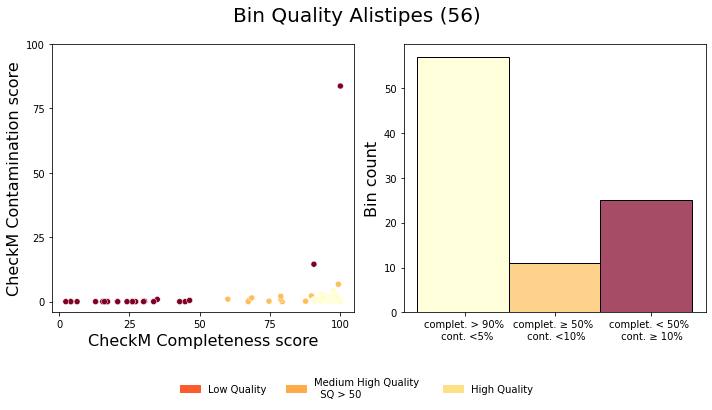

In [33]:
subplot_binQ(df_Alistipes_Q, df_Alistipes_Q, 'Alistipes (56)', nrOfclasses=3, paletteName="YlOrRd")

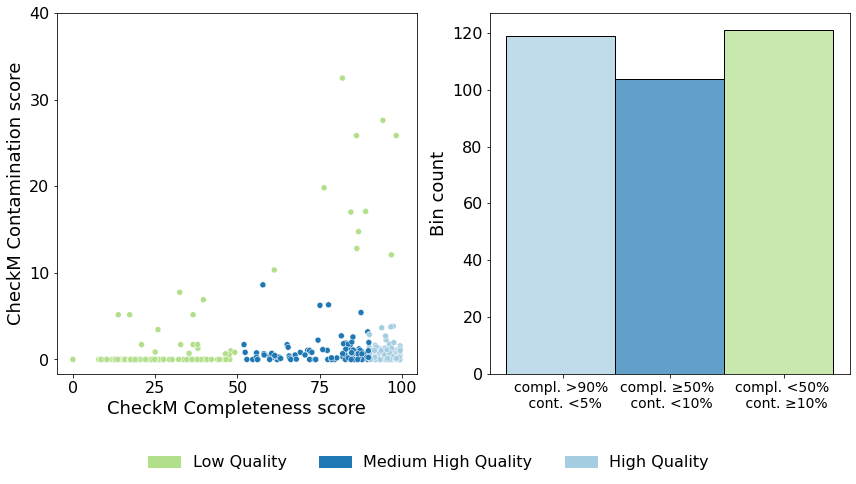

In [246]:
subplot_binQ(df_Lactobacillaceae_Q, df_Lactobacillaceae_Q, 'Family Lactobacillaceae (56)', 
             nrOfclasses=3, paletteName="Paired",  yticks = np.arange(0, 41, 10))
plt.savefig('resultFigs/binQuality_lactobacillaceae.png',  bbox_inches='tight')


In [35]:
df_Lactobacillaceae_Q.groupby('bin_class').count()

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,class_3
bin_class,,,,,,,,,,,,,,,,,,,,,
0,119,119,108,119,119,119,119,119,119,119,...,119,119,119,119,119,119,119,119,119,119
1,99,99,96,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,121,121,113,121,121,121,121,121,121,121,...,121,121,121,121,121,121,121,121,121,121


In [36]:
df_NCBI_Lactobacillus_Q.groupby('bin_class').count()

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,class_3
bin_class,,,,,,,,,,,,,,,,,,,,,
0,116,116,105,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116
1,94,94,91,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,94
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,118,118,110,118,118,118,118,118,118,118,...,118,118,118,118,118,118,118,118,118,118


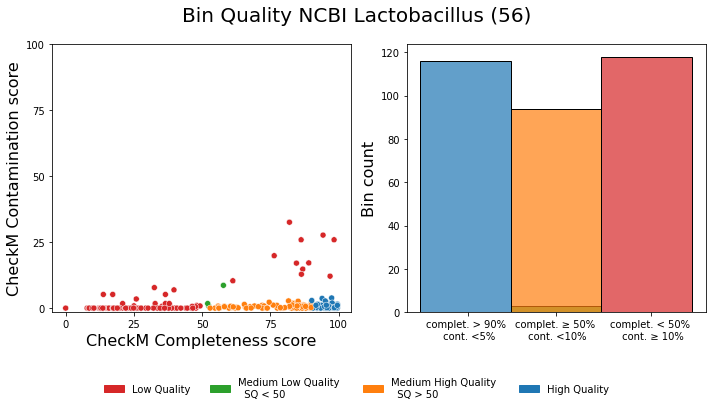

In [37]:

subplot_binQ(df_NCBI_Lactobacillus_Q, df_NCBI_Lactobacillus_Q, 'NCBI Lactobacillus (56)', nrOfclasses=4, paletteName="tab10")


### Saving high Quality bins

In [38]:
df_Lactobacillus_Q[df_Lactobacillus_Q['bin_class'] == 0].to_csv('data56_related_files/HighQLactobacillus', index =False)
df_Alistipes_Q[df_Alistipes_Q['bin_class'] == 0].to_csv('data56_related_files/HighQAlistipes', index = False)
df_Lactobacillaceae_Q[df_Lactobacillaceae_Q['bin_class'] == 0].to_csv('data56_related_files/HighQLactobacillaceae', index = False)
df_NCBI_Lactobacillus_Q[df_NCBI_Lactobacillus_Q['bin_class'] == 0].to_csv('data56_related_files/HighQ_NCBI_Lactobacillus', index = False)

### Bin quality on pooled vs individual samples 

In [7]:
metadata = pd.read_csv('data56_related_files/Metadata_56samples.tsv', sep='\t')

In [8]:
metadata

,Dataset,ID,Country,gender,"age,days,",Breed,"isolation,location",type,Feed,Temperature,...,vaccine,vægt,humidity,"sequencing,method","DNA,extraction","Sample,replicate","location_name,farm,",farm_ID,G bases,avg Mbases
0,Huang,SRR6323134,China,male,42,Arbor Acres broiler,cecum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,Combined Newcastle disease virus (NDV) and inf...,NaN,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,"2,40",NaN
1,Huang,SRR6323252,China,male,42,Arbor Acres broiler,duodenum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,Combined Newcastle disease virus (NDV) and inf...,NaN,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,"2,80",NaN
2,Huang,SRR6323384,China,male,42,Arbor Acres broiler,ileum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,Combined Newcastle disease virus (NDV) and inf...,NaN,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,"2,60",NaN
3,Huang,SRR6323414,China,male,42,Arbor Acres broiler,jejunum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,Combined Newcastle disease virus (NDV) and inf...,NaN,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,"3,00",NaN
4,Huang,SRR6323550,China,male,42,Arbor Acres broiler,colorectum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,Combined Newcastle disease virus (NDV) and inf...,NaN,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,"3,00",NaN
5,Huang,SRR6323556,China,female,42,Local yellow-feather chickens,cecum,layer,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,Combined Newcastle disease virus (NDV) and inf...,NaN,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Hunan,china2,"4,60",NaN
6,Huang,SRR6323530,China,female,42,Local yellow-feather chickens,ileum,layer,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,Combined Newcastle disease virus (NDV) and inf...,NaN,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Hunan,china2,"2,50",NaN
7,Huang,SRR6323503,China,female,42,Local yellow-feather chickens,colorectum,layer,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,Combined Newcastle disease virus (NDV) and inf...,NaN,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Hunan,china2,"4,20",NaN
8,Huang,SRR6323350,China,female,42,Local yellow-feather chickens,jejunum,layer,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,Combined Newcastle disease virus (NDV) and inf...,NaN,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Hunan,china2,"1,70",NaN
9,Huang,SRR6323197,China,female,42,Local yellow-feather chickens,duodenum,layer,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,Combined Newcastle disease virus (NDV) and inf...,NaN,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Hunan,china2,"3,20",NaN


In [13]:
sample_index = pd.read_csv('data56_related_files/sampleNamesIndex.txt', header = None)

In [14]:
sample_index.rename(columns={0: 'sampleNo', 1: 'ID'}, inplace=True)

In [16]:
sample_index['sampleNo'] = sample_index.sampleNo + 1

In [17]:
meta_sample = pd.merge(metadata, sample_index, how="inner", on='ID')

In [20]:
def condition_on_replicate(s):
#     'cage', 'free-range', ' conventional_broiler_house'):
    if 'pooled' in s['Sample,replicate']:
        return 'pooled'
    else:
        return 'single_replicate'

In [21]:
meta_sample['replicate_type'] = meta_sample.apply(condition_on_replicate, axis=1)

In [22]:
meta_sample

,Dataset,ID,Country,gender,"age,days,",Breed,"isolation,location",type,Feed,Temperature,...,humidity,"sequencing,method","DNA,extraction","Sample,replicate","location_name,farm,",farm_ID,G bases,avg Mbases,sampleNo,replicate_type
0,Huang,SRR6323134,China,male,42,Arbor Acres broiler,cecum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,"2,40",NaN,22,pooled
1,Huang,SRR6323252,China,male,42,Arbor Acres broiler,duodenum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,"2,80",NaN,33,pooled
2,Huang,SRR6323384,China,male,42,Arbor Acres broiler,ileum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,"2,60",NaN,41,pooled
3,Huang,SRR6323414,China,male,42,Arbor Acres broiler,jejunum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,"3,00",NaN,42,pooled
4,Huang,SRR6323550,China,male,42,Arbor Acres broiler,colorectum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,"3,00",NaN,50,pooled
5,Huang,SRR6323556,China,female,42,Local yellow-feather chickens,cecum,layer,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Hunan,china2,"4,60",NaN,51,pooled
6,Huang,SRR6323530,China,female,42,Local yellow-feather chickens,ileum,layer,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Hunan,china2,"2,50",NaN,49,pooled
7,Huang,SRR6323503,China,female,42,Local yellow-feather chickens,colorectum,layer,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Hunan,china2,"4,20",NaN,46,pooled
8,Huang,SRR6323350,China,female,42,Local yellow-feather chickens,jejunum,layer,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Hunan,china2,"1,70",NaN,39,pooled
9,Huang,SRR6323197,China,female,42,Local yellow-feather chickens,duodenum,layer,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Hunan,china2,"3,20",NaN,25,pooled


In [18]:
df_quality[['sampleNo', 'binNo']]=df_quality['Bin_Id'].str.split('C', expand=True)

In [23]:
df_quality['sampleNo'] = df_quality['sampleNo'].map(lambda x: x.lstrip('S')).astype(int)

In [24]:
meta_replicate = meta_sample[['sampleNo', 'replicate_type']]

In [25]:
quality_replicate  = df_quality.join(meta_replicate.set_index('sampleNo'), on='sampleNo')

In [27]:
quality_replicate['replicate_type'].unique()

array(['pooled', 'single_replicate'], dtype=object)

In [54]:
quality_replicate.groupby('replicate_type').count()

,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3,sampleNo,binNo
replicate_type,,,,,,,,,,,,,,,,,,
pooled,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526
single_replicate,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439


In [321]:
pooled = quality_replicate[quality_replicate['replicate_type']== 'pooled']
single_replicate = quality_replicate[quality_replicate['replicate_type']== 'single_replicate']

In [476]:
def drawcountPlot(axes, df, palette):
    
    sns.countplot(x = 'class_3', 
                  hue = 'replicate_type', 
                  data = df, 
                  palette = palette)
    
    
    axes.set_xticklabels(labels = ['High', 'Medium', 'Low'], fontsize=16)
    axes.set_ylabel('Bin count', fontsize=20)
    axes.set_xlabel('')
    plt.yticks(fontsize=20)
    
    legend_labels, _= axes.get_legend_handles_labels()
    axes.legend(legend_labels, ['Pooled','Single replicate'], 
#           bbox_to_anchor=(1,1),
            loc = 'center', 
            bbox_to_anchor = (0.5, -0.1),
                ncol = 3,
          title='', 
          frameon = False,
          fontsize = 20,
          title_fontsize = 22)
    

    
#     plt.show()


In [466]:
def subplot_binQ_histcompare (df, title, paletteName, yticks=np.arange(0, 101, 25)):
    fig, axes = plt.subplots(1, 1, figsize=(12,6))
#     fig.suptitle('Bin Quality ' + title, fontsize=20) 
#     plt.yticks(fontsize=16)
#     plt.xticks(fontsize=14)
    
    palette = setPalette(paletteName)
    
    drawcountPlot(axes, df, paletteName)
  
    plt.tight_layout()

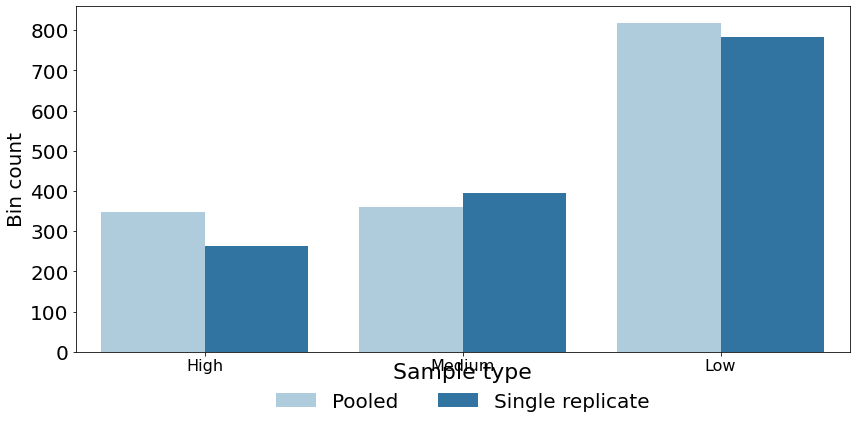

In [467]:
subplot_binQ_histcompare(quality_replicate, 'title', 
             paletteName="Paired" )

# plt.savefig('resultFigs/sampletype_binQ.png', bbox_inches='tight')

To further understand the difference between pooled and individual samples we look into the bins after dereplication to see if the number of bins are replicates to a higher degree in any of the two groups

In [468]:
df_dereplicated_bins = pd.read_csv('data56_related_files/derepelicatedBins_dRep.tsv')

In [469]:
dereplicated_bins = df_dereplicated_bins['derepelicatedBins_dRep'].str.replace('.fna', '')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [470]:
drep_quality_replicate = quality_replicate[quality_replicate['Bin_Id'].isin(dereplicated_bins)]

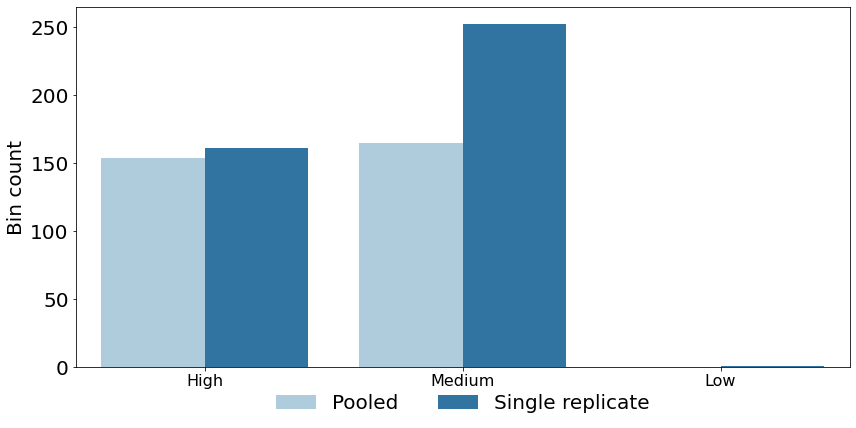

In [477]:
subplot_binQ_histcompare(drep_quality_replicate, 'title', 
             paletteName="Paired" )

plt.savefig('resultFigs/dRep_sampletype_binQ.png', bbox_inches='tight')

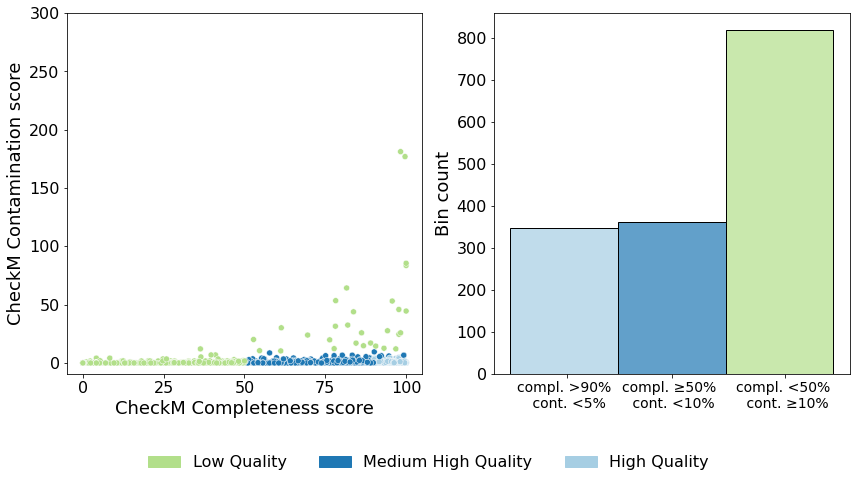

In [376]:
subplot_binQ(pooled, pooled, 'Pooled samples', nrOfclasses=3, 
             paletteName="Paired", yticks = np.arange(0, 301, 50))

plt.savefig('resultFigs/pooled_binQ',  bbox_inches='tight')

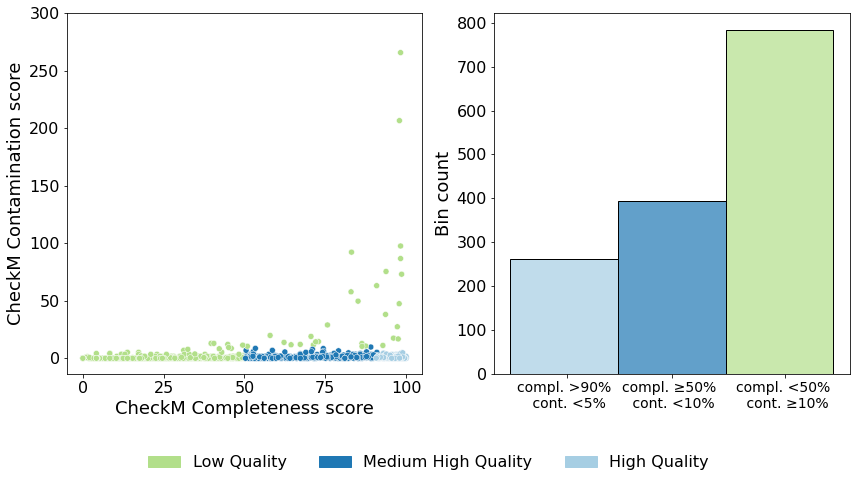

In [319]:
subplot_binQ(single_replicate, single_replicate, 'single replicate samples', 
             nrOfclasses=3, paletteName="Paired",
             yticks = np.arange(0, 301, 50))
plt.savefig('resultFigs/singleRep_binQ',  bbox_inches='tight')

In [47]:
pooled.groupby('bin_class').count()


,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,class_3,sampleNo,binNo,replicate_type
bin_class,,,,,,,,,,,,,,,,,,
0,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347
1,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334
2,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
3,818,818,818,818,818,818,818,818,818,818,818,818,818,818,818,818,818,818


In [48]:
single_replicate.groupby('bin_class').count()

,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,class_3,sampleNo,binNo,replicate_type
bin_class,,,,,,,,,,,,,,,,,,
0,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262
1,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348
2,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
3,783,783,783,783,783,783,783,783,783,783,783,783,783,783,783,783,783,783


In [271]:
drep_pooled = pooled[pooled['Bin_Id'].isin(dereplicated_bins)]

In [272]:
drep_pooled

,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3,sampleNo,binNo,replicate_type
2,S10C1039,o__Lactobacillales_(UID355),490,334,183,3,331,0,0,0,0,98.91,0.00,0.0,0,0,10,1039,pooled
7,S10C1295,o__Campylobacterales_(UID3068),106,477,284,224,249,4,0,0,0,52.55,0.66,25.0,2,1,10,1295,pooled
8,S10C1297,o__Lactobacillales_(UID374),471,350,191,8,341,1,0,0,0,96.60,0.26,0.0,0,0,10,1297,pooled
10,S10C15900,p__Bacteroidetes_(UID2605),350,314,208,1,311,2,0,0,0,99.52,0.96,0.0,0,0,10,15900,pooled
21,S10C2556,k__Bacteria_(UID203),5449,103,57,49,53,1,0,0,0,73.68,1.75,0.0,1,1,10,2556,pooled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952,S9C61,g__Campylobacter_(UID3076),40,926,174,4,920,2,0,0,0,99.57,0.15,0.0,0,0,9,61,pooled
2961,S9C8881,o__Bacteroidales_(UID2657),160,492,269,58,431,3,0,0,0,88.01,0.63,0.0,1,1,9,8881,pooled
2962,S9C92,o__Actinomycetales_(UID1572),580,286,172,11,275,0,0,0,0,96.12,0.00,0.0,0,0,9,92,pooled
2963,S9C962,o__Campylobacterales_(UID3068),106,477,284,13,463,1,0,0,0,96.30,0.18,100.0,0,0,9,962,pooled


In [273]:
drep_single_replicate = single_replicate[single_replicate['Bin_Id'].isin(dereplicated_bins)]

In [274]:
drep_single_replicate

,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3,sampleNo,binNo,replicate_type
650,S21C1042,o__Clostridiales_(UID1212),172,263,149,24,234,5,0,0,0,87.25,1.79,80.00,1,1,21,1042,single_replicate
651,S21C11145,o__Clostridiales_(UID1212),172,261,147,3,257,1,0,0,0,97.96,0.14,0.00,0,0,21,11145,single_replicate
653,S21C1234,o__Clostridiales_(UID1212),172,263,149,54,191,18,0,0,0,79.08,6.48,61.11,2,1,21,1234,single_replicate
655,S21C13428,o__Clostridiales_(UID1212),172,261,147,36,224,1,0,0,0,83.31,0.68,100.00,1,1,21,13428,single_replicate
656,S21C1343,o__Clostridiales_(UID1226),155,278,158,33,244,1,0,0,0,89.32,0.11,0.00,1,1,21,1343,single_replicate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,S55C1776,k__Bacteria_(UID203),5449,104,58,65,39,0,0,0,0,58.62,0.00,0.00,1,1,55,1776,single_replicate
2624,S56C1157,c__Bacilli_(UID285),586,325,181,107,211,7,0,0,0,61.10,1.93,14.29,1,1,56,1157,single_replicate
2630,S56C1995,k__Bacteria_(UID203),5449,103,58,53,49,1,0,0,0,74.14,1.72,100.00,1,1,56,1995,single_replicate
2638,S56C3165,k__Bacteria_(UID203),5449,104,58,61,43,0,0,0,0,59.80,0.00,0.00,1,1,56,3165,single_replicate


In [276]:
drep_single_replicate.groupby('bin_class').count()

,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,class_3,sampleNo,binNo,replicate_type
bin_class,,,,,,,,,,,,,,,,,,
0,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161
1,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218
2,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [278]:
drep_pooled.groupby('bin_class').count()

,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,class_3,sampleNo,binNo,replicate_type
bin_class,,,,,,,,,,,,,,,,,,
0,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154
1,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152
2,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


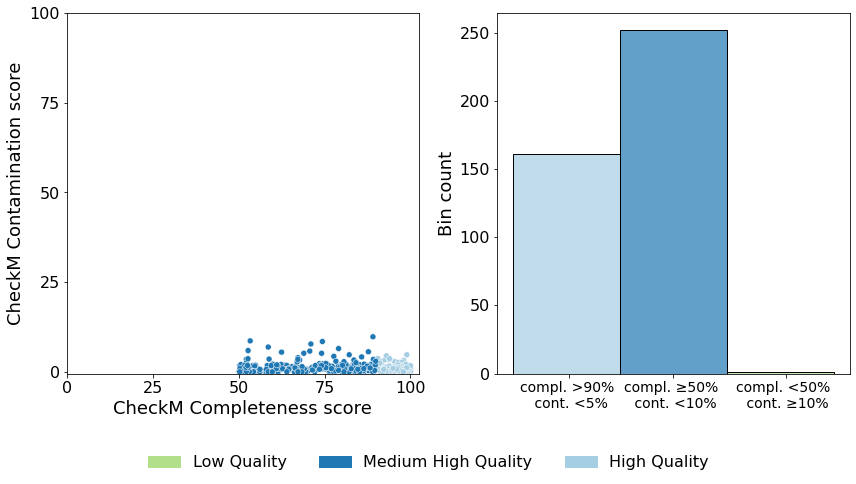

In [317]:
subplot_binQ(drep_single_replicate, drep_single_replicate, 'dereplicated single replicate samples', 
             nrOfclasses=3, paletteName="Paired")

plt.savefig('resultFigs/drep_singleRep_binQ',  bbox_inches='tight')

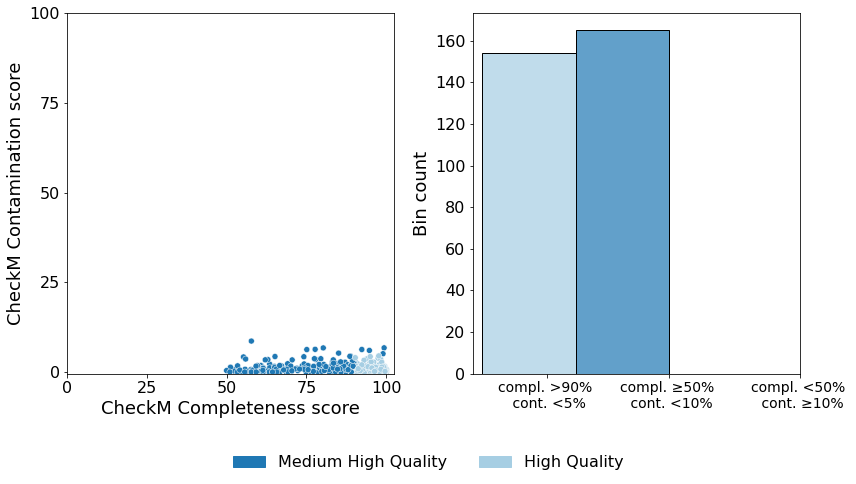

In [314]:
subplot_binQ(drep_pooled, drep_pooled, 'dereplicated pooled samples', 
             nrOfclasses=2, paletteName="Paired")

# plt.savefig('resultFigs/drep_pooled_binQ',  bbox_inches='tight')